This notebook was heavily inspired by [this notebook](https://www.kaggle.com/code/nadiate/eda-spacex-ordinal-encoding) I found on kaggle.

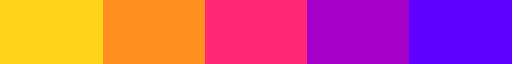

In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import chardet
import missingno as msno

# visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline
my_colors = ['#ffd319', '#ff901f', "#ff2975", '#a400c7', '#6000ff']
newcmp = ListedColormap(my_colors)
newcmp


# Preparing the data

In [107]:
df = pd.read_csv('data/spaceX-missions.csv')


In [108]:
df.dtypes


Flight Number         object
Launch Date           object
Launch Time           object
Launch Site           object
Vehicle Type          object
Payload Name          object
Payload Type          object
Payload Mass (kg)    float64
Payload Orbit         object
Customer Name         object
Customer Type         object
Customer Country      object
Mission Outcome       object
Failure Reason        object
Landing Type          object
Landing Outcome       object
dtype: object

<AxesSubplot: >

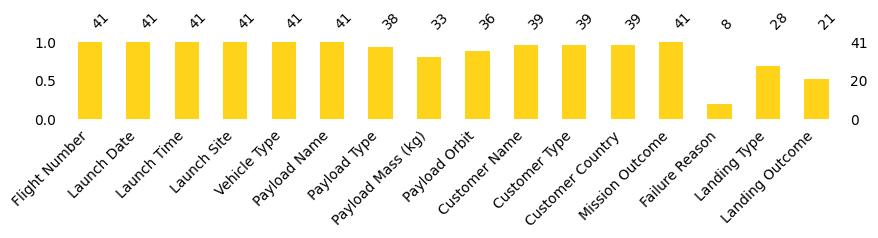

In [109]:
msno.bar(df, color=my_colors[0], labels="null values",
         figsize=(10, 1), fontsize=10)


In [110]:
df.fillna(0, inplace=True)


<AxesSubplot: >

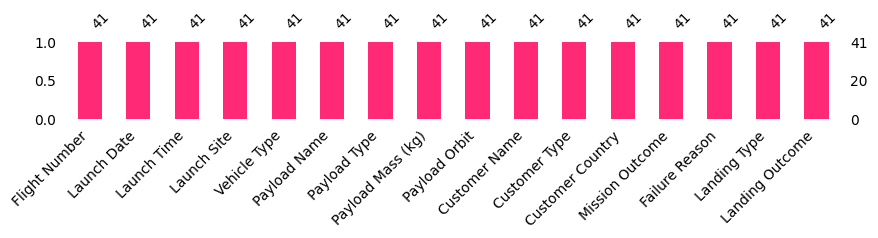

In [111]:
msno.bar(df, color=my_colors[2], labels="null values",
         figsize=(10, 1), fontsize=10)


In [112]:
df.columns = [i.replace(' ', '_') for i in df.columns]
df.rename(columns={"Payload_Mass_(kg)": "Payload_Mass"}, inplace=True)
df['year'] = pd.DatetimeIndex(df['Launch_Date']).year
df['month'] = pd.DatetimeIndex(df['Launch_Date']).month
df['Payload_Mass'] = pd.to_numeric(df['Payload_Mass'])
df.head(2)


,Flight_Number,Launch_Date,Launch_Time,Launch_Site,Vehicle_Type,Payload_Name,Payload_Type,Payload_Mass,Payload_Orbit,Customer_Name,Customer_Type,Customer_Country,Mission_Outcome,Failure_Reason,Landing_Type,Landing_Outcome,year,month
0,F1-1,24 March 2006,22:30,Marshall Islands,Falcon 1,FalconSAT-2,Research Satellite,19.5,0,DARPA,Government,United States,Failure,Engine Fire During Launch,0,0,2006,3
1,F1-2,21 March 2007,01:10,Marshall Islands,Falcon 1,DemoSat,0,0.0,0,DARPA,Government,United States,Failure,Engine Shutdown During Launch,0,0,2007,3


In [113]:
df1 = df['Payload_Type'].value_counts()


# Visualizing the data

In [129]:
fig = go.Figure(
    data=[go.Pie(labels=df1.keys(), values=df1.values, pull=[0.1])])
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker=dict(line=dict(color='white', width=1)))
fig.update_layout(template="plotly_dark", title_text='Payload Ditribution')

fig.show()


In [115]:
df2 = df.groupby(by="Customer_Country").sum(numeric_only=True)
# rename index
df2 = df2.rename_axis('Customer_Country').reset_index()
# delete empty countries
df2 = df2[df2.Customer_Country != 0]
df2.sort_values(by=['Payload_Mass'], ascending=False, inplace=True)


In [146]:
fig = px.bar(df2, x='Customer_Country', y='Payload_Mass', labels=dict(Customer_Country='Country', Payload_Mass='Payload in KG'), color='Payload_Mass',
             title='<b>Payload Mass by country </b>')
fig.update_layout(template="plotly_dark")
fig.update_traces(marker=dict(line=dict(width=1.5, color="#fff")))

fig.show()
